In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 100
plt.rcParams['savefig.dpi'] = 100

### $$y'' = 10 \sin(\omega t) -5y'-6y$$

### $$y(0) = 0  , \ y'(0)=5$$

In [63]:
omega = 1

dt = 0.1
time = np.arange(0, 3.001, dt)

f = lambda t,z1,z2: 10*np.sin(omega*t) - 5*z2 - 6*z1

z1 = np.zeros_like(time)
z2 = np.zeros_like(time)
# initial conditions
z1[0] = 0
z2[0] = 5

# Exact Solution

### $$y=-6 e^{-3t} + 7e^{-2t}+\sin t - \cos t$$

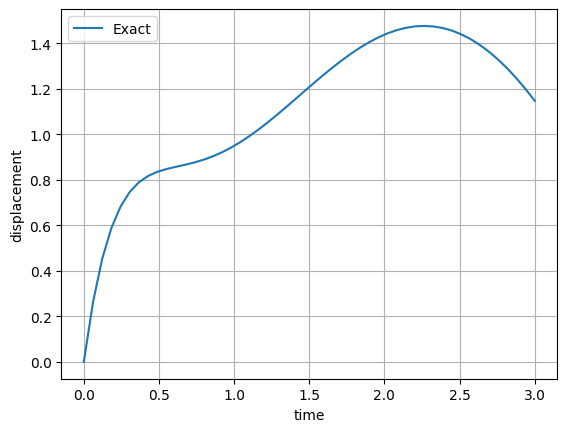

In [64]:
# plot exact solution first
time = np.linspace(0, 3)
y_exact = (-6*np.exp(-3*time) + 7*np.exp(-2*time) + np.sin(time) - np.cos(time))

plt.plot(time, y_exact, label='Exact')
plt.xlabel('time')
plt.ylabel('displacement')
plt.legend()
plt.grid(True)
plt.show()

# Heun's Method

### $$f(t, y, y') = 10 \sin(\omega t) -5y'-6y$$
### $$t_{i+1}=t_i + h$$

### $$\widetilde{y}_{𝑖+1}=𝑦_𝑖+ ℎ 𝑦_𝑖'$$
### $$\widetilde{y}_{i+1}'=𝑦_𝑖'+ ℎ𝑓(𝑥,𝑦_𝑖 ,y_{i}' )$$
### $$𝑦_{i+1} =𝑦_𝑖 + \frac{h}{2} \Big (𝑦_𝑖'+\widetilde{y}_{i+1}'  \Big )$$
### $$𝑦_{i+1}'=𝑦_𝑖'+ \frac{h}{2} \Big(𝑓(𝑡_𝑖, 𝑦_𝑖, 𝑦_𝑖' )+𝑓(𝑡_{i+1}, \widetilde{y}_{i+1},  \widetilde{y}_{i+1}' ) \Big)$$

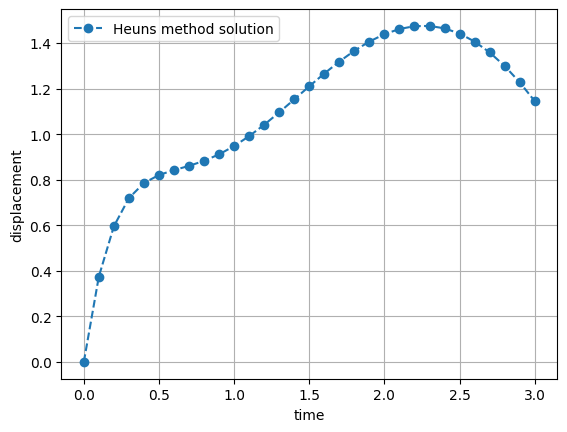

In [65]:
# z1 = y(t)
# z2 = y'(t)
time = np.arange(0, 3.001, dt)

z1p = np.zeros_like(time)
z2p = np.zeros_like(time)

for idx, t in enumerate(time[:-1]):
    # Prédicteur
    z1p[idx+1] = z1[idx] + dt*z2[idx]
    z2p[idx+1] = z2[idx] + dt*f(t, z1[idx], z2[idx])
    
    # Correcteur
    z1[idx+1] = z1[idx] + 0.5*dt*(z2[idx] + z2p[idx+1])
    z2[idx+1] = z2[idx] + 0.5*dt*( f(t, z1[idx], z2[idx]) + f(time[idx+1], z1p[idx+1], z2p[idx+1]) )

plt.plot(time, z1, 'o--', label='Heuns method solution')
plt.xlabel('time')
plt.ylabel('displacement')
plt.legend()
plt.grid(True)
plt.show()

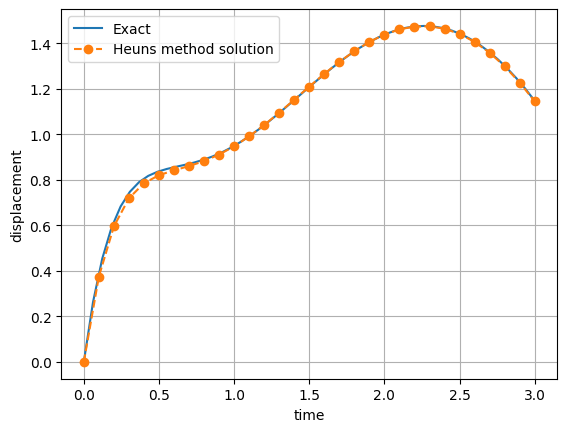

In [66]:
time = np.linspace(0, 3)
plt.plot(time, y_exact, label='Exact')

time = np.arange(0, 3.001, dt)
plt.plot(time, z1, 'o--', label='Heuns method solution')
plt.xlabel('time')
plt.ylabel('displacement')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
np.arange(0, 3.001, dt)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. ])

In [68]:
np.linspace(0, 3, 31)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. ])